# # Лабораторная работа 3: Классификация грибов

## Загрузка данных и импорт библиотек


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

# Создаем папку для результатов 

In [2]:
os.makedirs('../results/images', exist_ok=True)
os.makedirs('../results/models', exist_ok=True)

# Загрузка данных

In [3]:
data = pd.read_csv('../data/mushrooms.csv')
print("Первые 5 строк данных:")
data.head()

Первые 5 строк данных:


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


# ## Предварительный анализ данных

# Основная информация

In [4]:
print("\nИнформация о данных:")
data.info()



Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  st

# Проверка на пропуски



In [5]:
print("\nПропущенные значения:")
print(data.isnull().sum())




Пропущенные значения:
class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64


# ## Визуализация данных

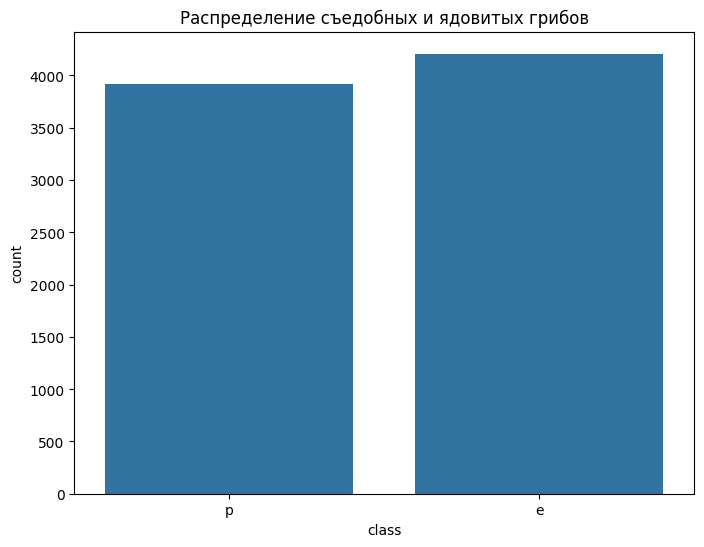

In [6]:
# Распределение классов
plt.figure(figsize=(8, 6))
sns.countplot(x='class', data=data)
plt.title('Распределение съедобных и ядовитых грибов')
plt.savefig('../results/images/class_distribution.png')
plt.show()

# ## Предобработка данных




In [7]:
# Кодирование категориальных признаков
label_encoders = {}
for column in data.columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le
    

In [8]:
# Разделение данных
X = data.drop('class', axis=1)
y = data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
# Масштабирование
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ## Обучение моделей

In [10]:
# Логистическая регрессия
print("\nЛогистическая регрессия:")
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))



Логистическая регрессия:
Accuracy: 0.9516
Confusion Matrix:
 [[1197   60]
 [  58 1123]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95      1257
           1       0.95      0.95      0.95      1181

    accuracy                           0.95      2438
   macro avg       0.95      0.95      0.95      2438
weighted avg       0.95      0.95      0.95      2438



In [11]:
# KNN с оптимизацией параметров
print("\nОптимизация KNN:")
param_grid = {
    'n_neighbors': range(1, 20),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Лучшие параметры:", grid_search.best_params_)
print("Лучшая точность:", grid_search.best_score_)


Оптимизация KNN:
Лучшие параметры: {'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}
Лучшая точность: 1.0


In [12]:
# Тестирование лучшей модели
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)
print(f"\nAccuracy на тесте: {accuracy_score(y_test, y_pred):.4f}")


Accuracy на тесте: 1.0000


# ## Сохранение результатов

In [13]:
# Сохранение лучшей модели
import joblib
joblib.dump(best_knn, '../results/models/best_knn_model.pkl')

['../results/models/best_knn_model.pkl']

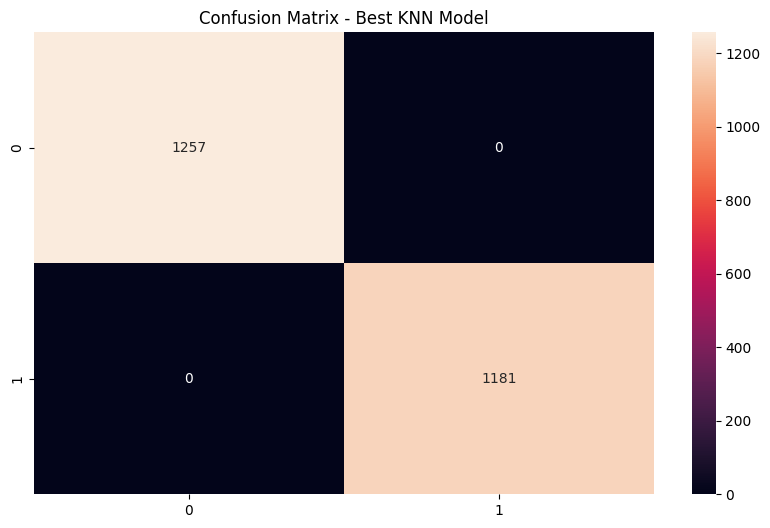

In [14]:
# Сохранение графиков
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title('Confusion Matrix - Best KNN Model')
plt.savefig('../results/images/confusion_matrix.png')
plt.show()